In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from numerov.rydberg import RydbergState

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("numerov").setLevel(logging.WARNING)

In [2]:
method = "exact"
T_in_K = 300
state = RydbergState("Rb", n=30, l=0, j=0.5, m=0.5)

lifetime_0 = state.get_lifetime(method=method)
lifetime_T = state.get_lifetime(T_in_K, temperature_unit="K", method=method)

print(f"Lifetime at T=0: {lifetime_0.to('mus'):.2f}")
print(f"Lifetime at T={T_in_K}K: {lifetime_T.to('mus'):.2f}")

TypeError: RydbergState.calc_matrix_element() missing 1 required positional argument: 'k_angular'

Number of possible spontaneous decay transitions: 125
Number of considered BBR transitions: 255


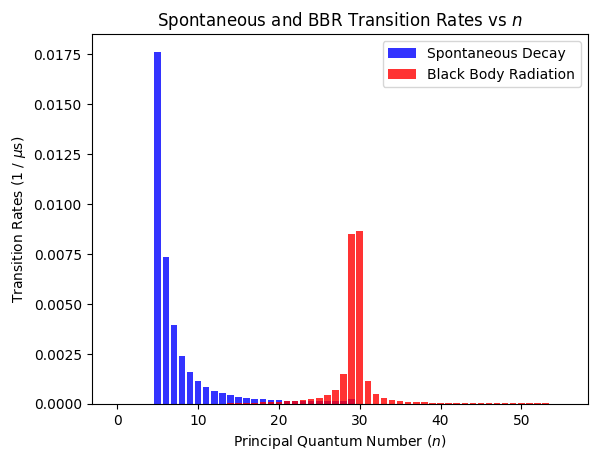

In [ ]:
states_sp, transition_rates_sp = state.get_spontaneous_transition_rates(unit="1/mus", method=method)
print(f"Number of possible spontaneous decay transitions: {len(transition_rates_sp)}")

states_bbr, transition_rates_bbr = state.get_black_body_transition_rates(T_in_K, "kelvin", unit="1/mus", method=method)
print(f"Number of considered BBR transitions: {len(transition_rates_bbr)}")

fig, ax = plt.subplots()

n_list = np.arange(0, np.max([s.n for s in states_bbr]) + 1)
rates_summed = {}
for key, states, rates in [("BBR", states_bbr, transition_rates_bbr), ("SP", states_sp, transition_rates_sp)]:
    rates_summed[key] = np.zeros(len(n_list))
    for i, s in enumerate(states):
        rates_summed[key][s.n] += rates[i]

ax.bar(n_list, rates_summed["SP"], label="Spontaneous Decay", color="blue", alpha=0.8)
ax.bar(n_list, rates_summed["BBR"], label="Black Body Radiation", color="red", alpha=0.8)
ax.legend()

ax.set_xlabel("Principal Quantum Number ($n$)")
ax.set_ylabel(r"Transition Rates (1 / $\mu$s)")
ax.set_title("Spontaneous and BBR Transition Rates vs $n$")

plt.show()